In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [7]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.shape

(5572, 5)

# Data Cleaning

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# dropping the unnecessay columns
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [15]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Renaming the columns
data.rename(columns={"v1":"label",'v2':"text"},inplace=True)
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# label encoding for spam and ham
encoder = LabelEncoder()
data["label"] = encoder.fit_transform(data["label"])

In [ ]:
data.head() # 0 - ham and 1 - spam

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# check for missing values
data.isna()

,label,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [34]:
# check for duplicate values
data.duplicated().sum()

np.int64(403)

In [37]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

np.int64(0)

In [38]:
data.shape

(5169, 2)

# EDA - Exploratory Data Analysis

In [39]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
data["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

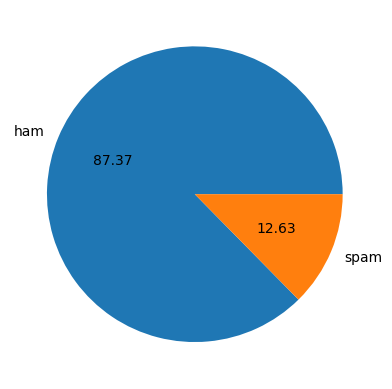

In [49]:
plt.pie(data["label"].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [71]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /home/addy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [66]:
# number of charchters
data["num_charachters"] = data["text"].apply(len)

In [67]:
data.head()

,label,text,num_charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words 
data["num_words"] = data["text"].apply(lambda x : len(nltk.word_tokenize(x)))
data.head()

,label,text,num_charachters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
# num of sentence
data["num_sentence"] = data["text"].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,label,text,num_charachters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
data[["num_charachters","num_words","num_sentence"]].describe()

,num_charachters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# for ham messages
data[data["label"] == 0][["num_charachters","num_words","num_sentence"]].describe()

,num_charachters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
# for spam messages
data[data["label"] == 1][["num_charachters","num_words","num_sentence"]].describe()

,num_charachters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_charachters', ylabel='Count'>

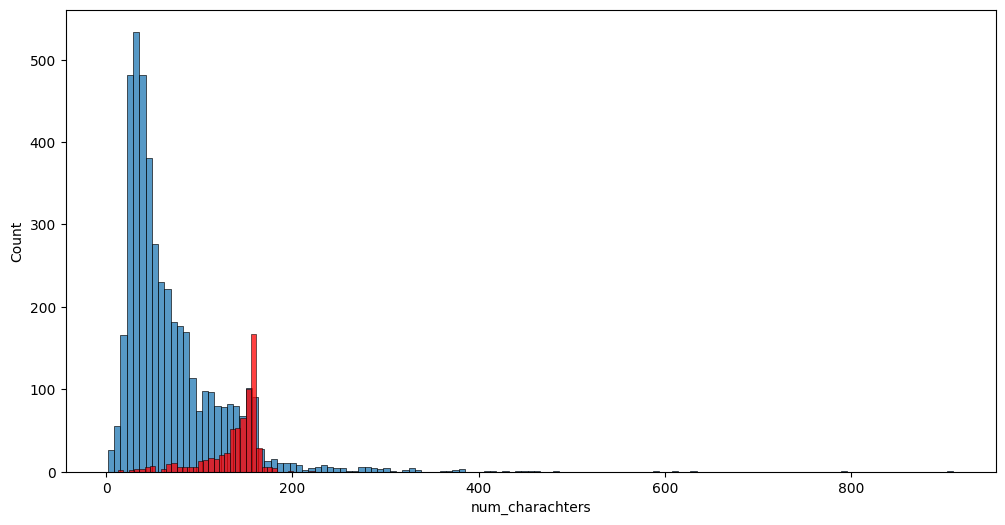

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["label"]==0]["num_charachters"])
sns.histplot(data[data["label"]==1]["num_charachters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

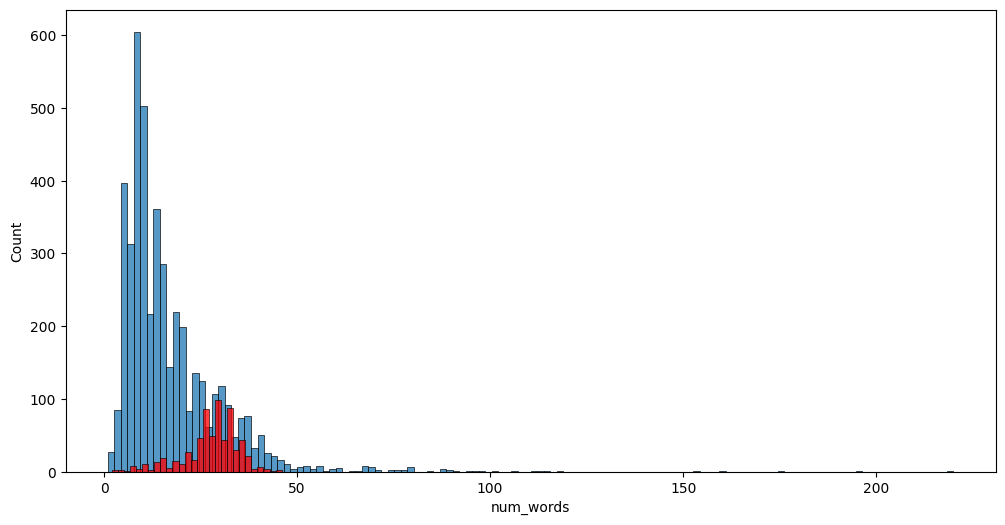

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["label"]==0]["num_words"])
sns.histplot(data[data["label"]==1]["num_words"],color="red")

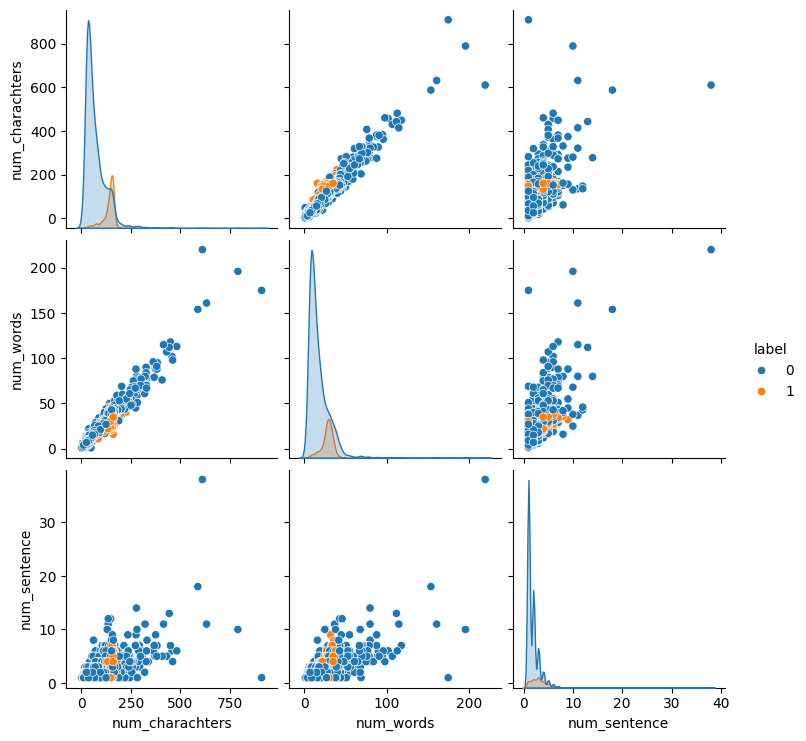

In [92]:
sns.pairplot(data,hue="label")

<Axes: >

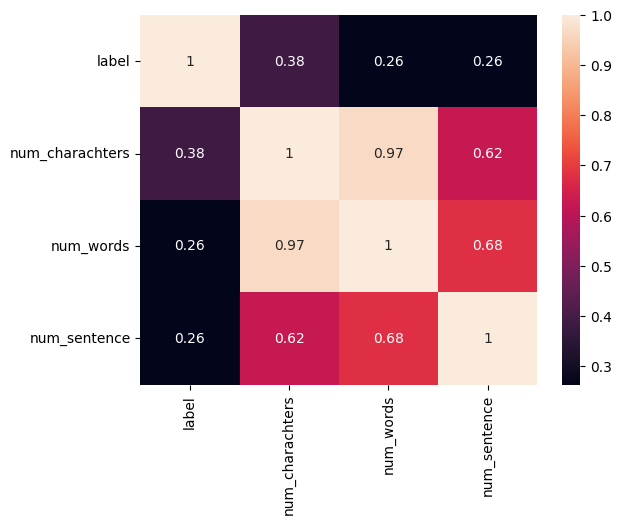

In [96]:
# Compute correlation matrix for numeric columns only
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True)